<a href="https://colab.research.google.com/github/Althaf777/Object-Detection-using-YOLO/blob/main/Helmet_Detection_using_YOLO11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Dec 31 14:58:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.4/904.4 kB 51.0 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="12sQlVz6uUeDJPMLlCv9")
project = rf.workspace("lam-phams-project-workspace").project("helmet-detection-2fyas")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detection-1 in yolov11:: 100%|██████████| 2028/2028 [00:00<00:00, 4451.34it/s]


In [6]:
dataset.location

'/content/Helmet-Detection-1'

Training YOLO11 model on a custom dataset

In [9]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 285MB/s]
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Helmet-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

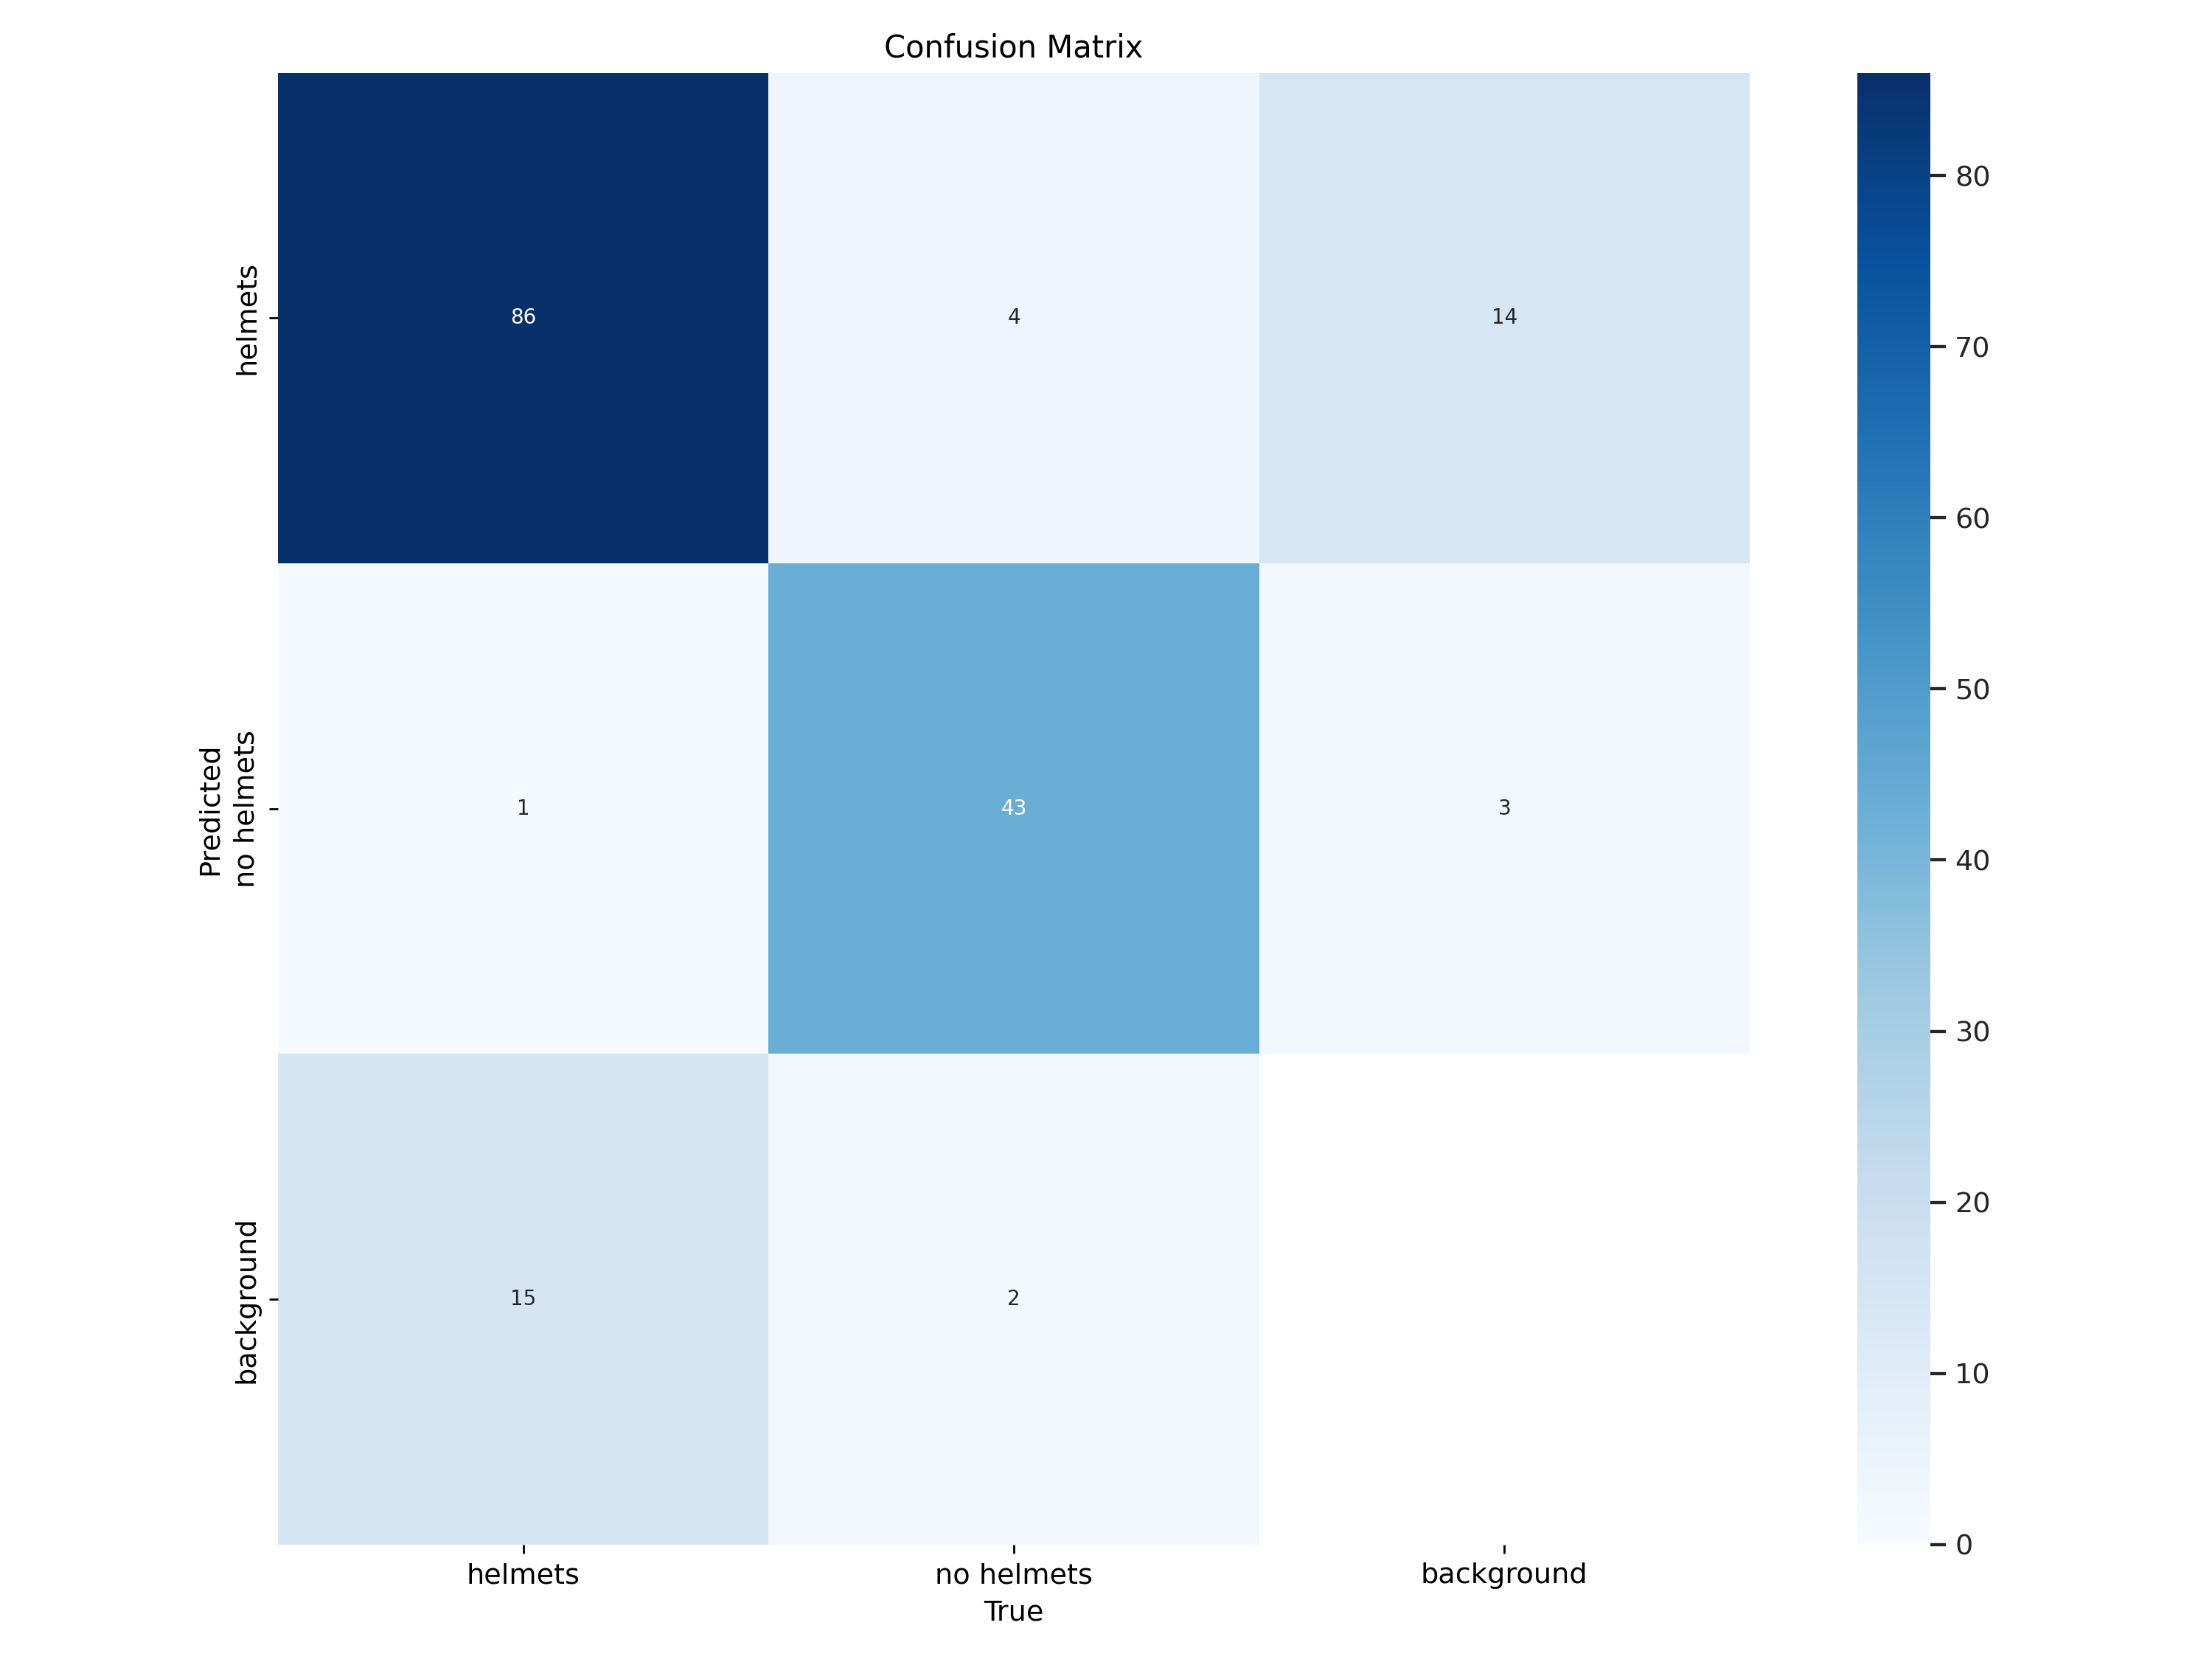

In [10]:
Image("/content/runs/detect/train/confusion_matrix.png",width=600)

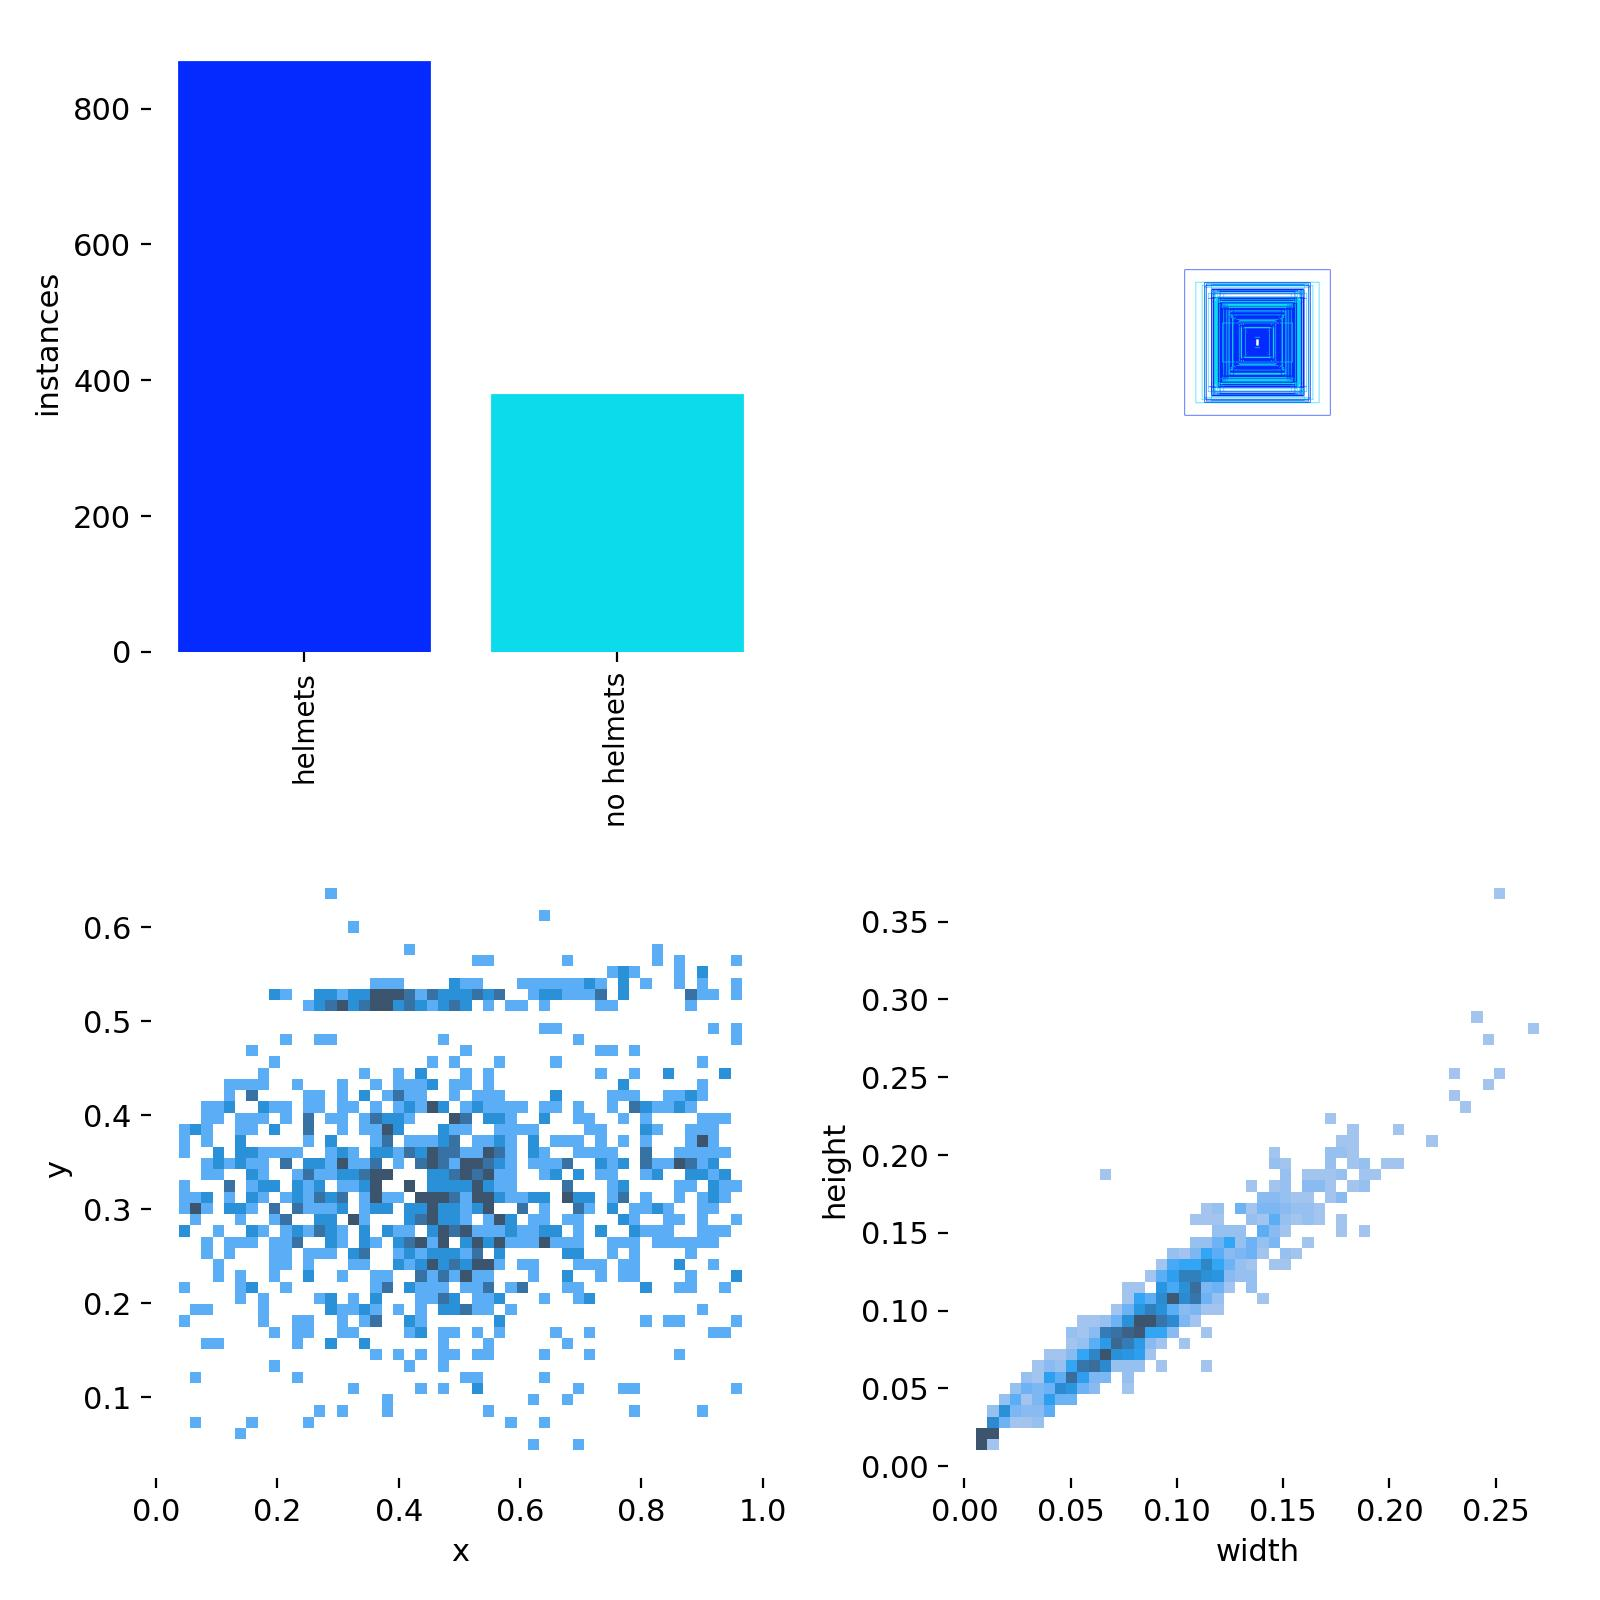

In [11]:
Image("/content/runs/detect/train/labels.jpg",width=600)

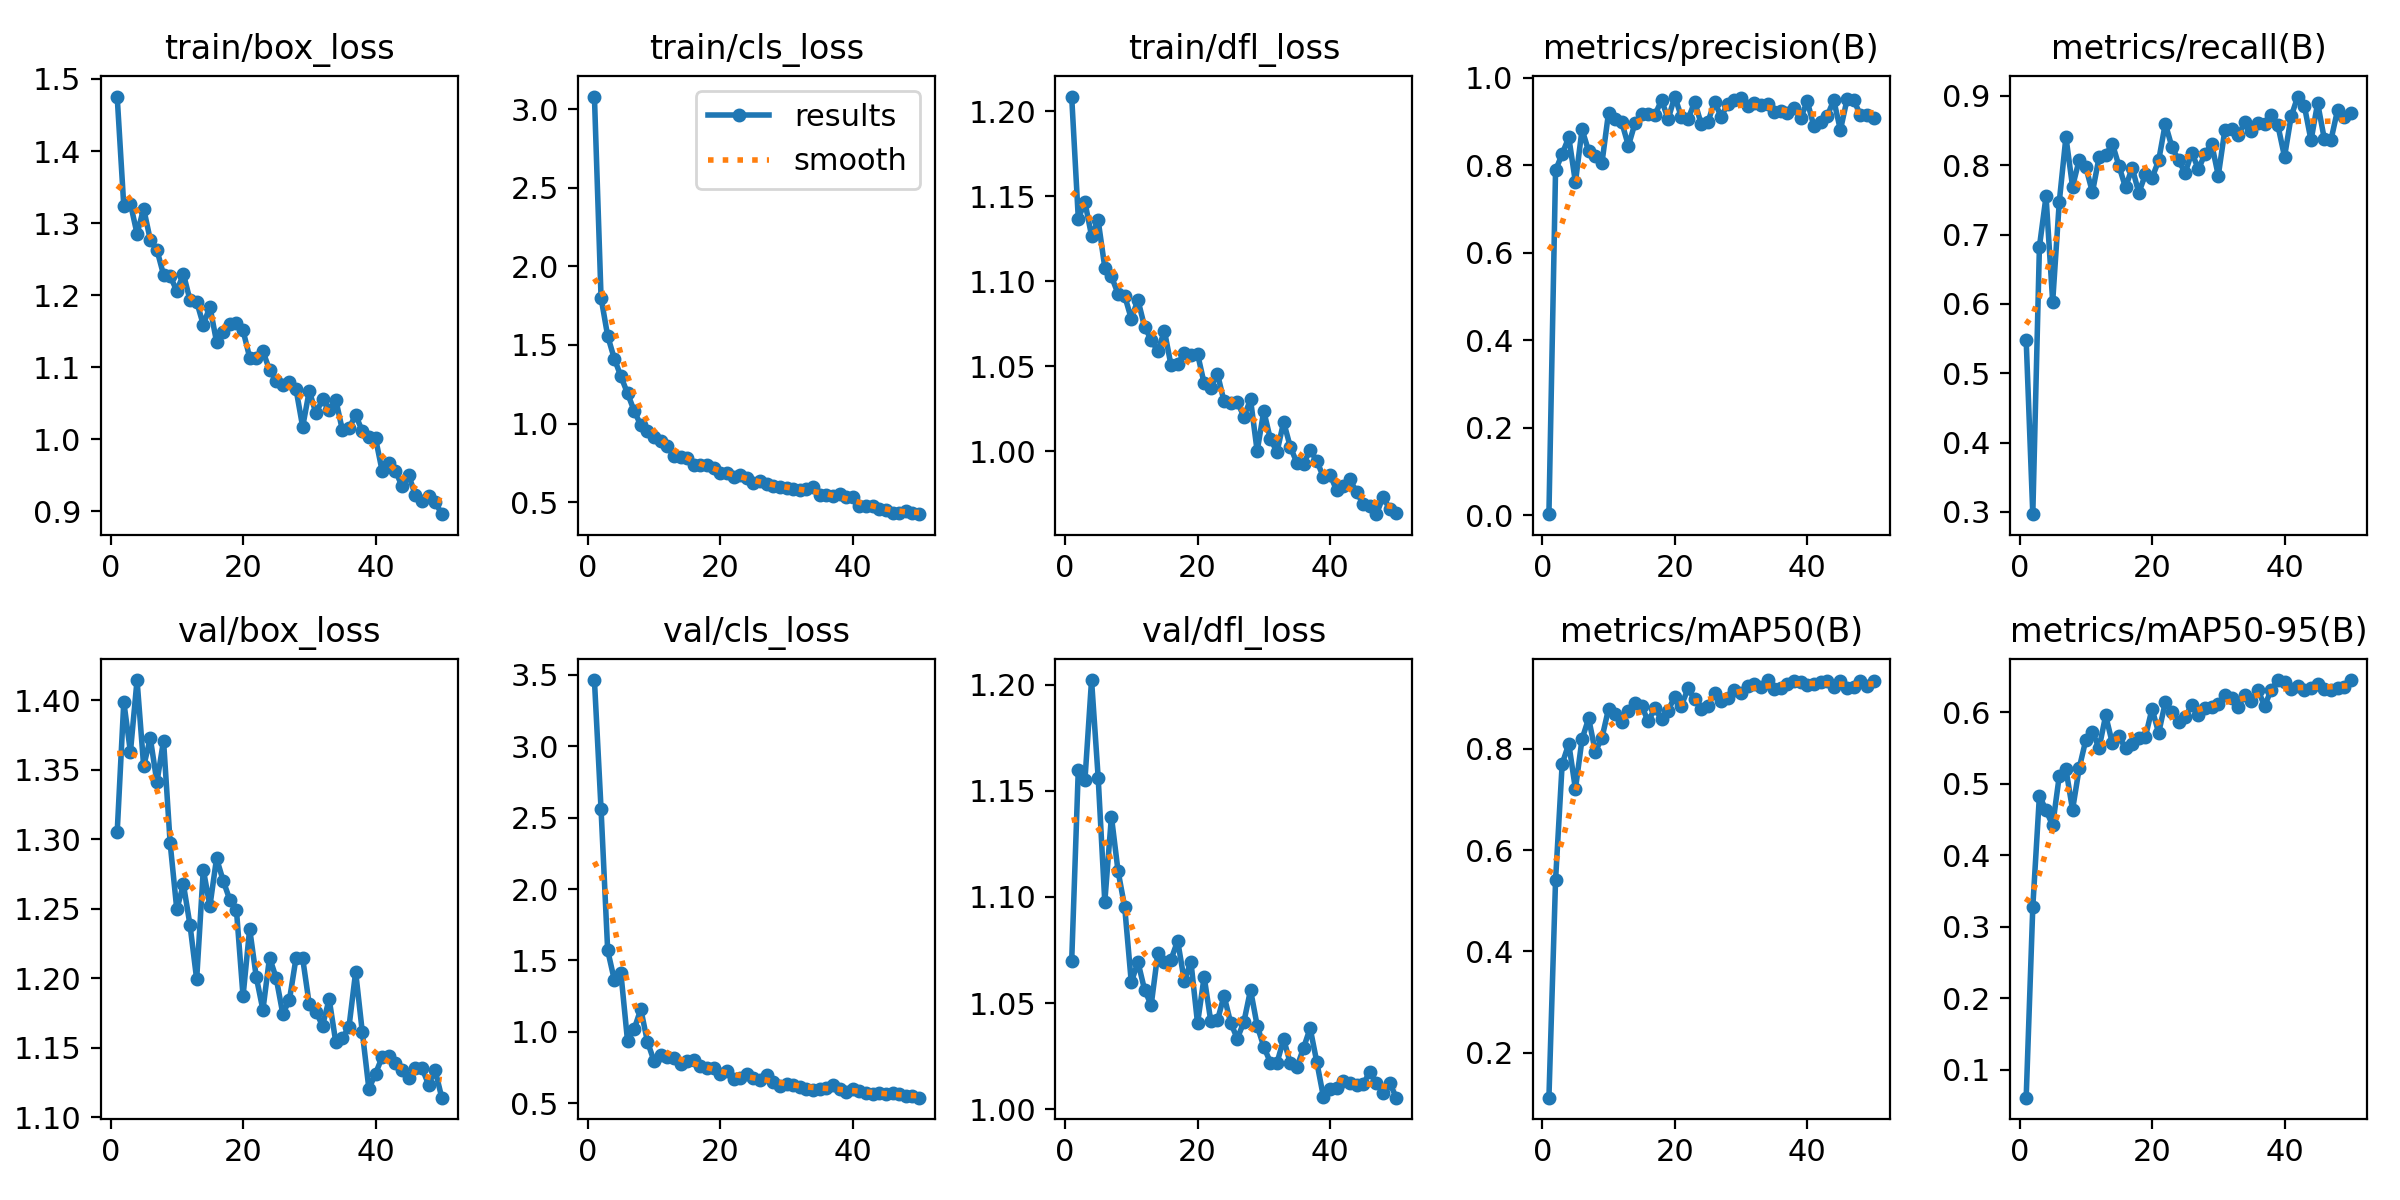

In [12]:
Image("/content/runs/detect/train/results.png",width=600)

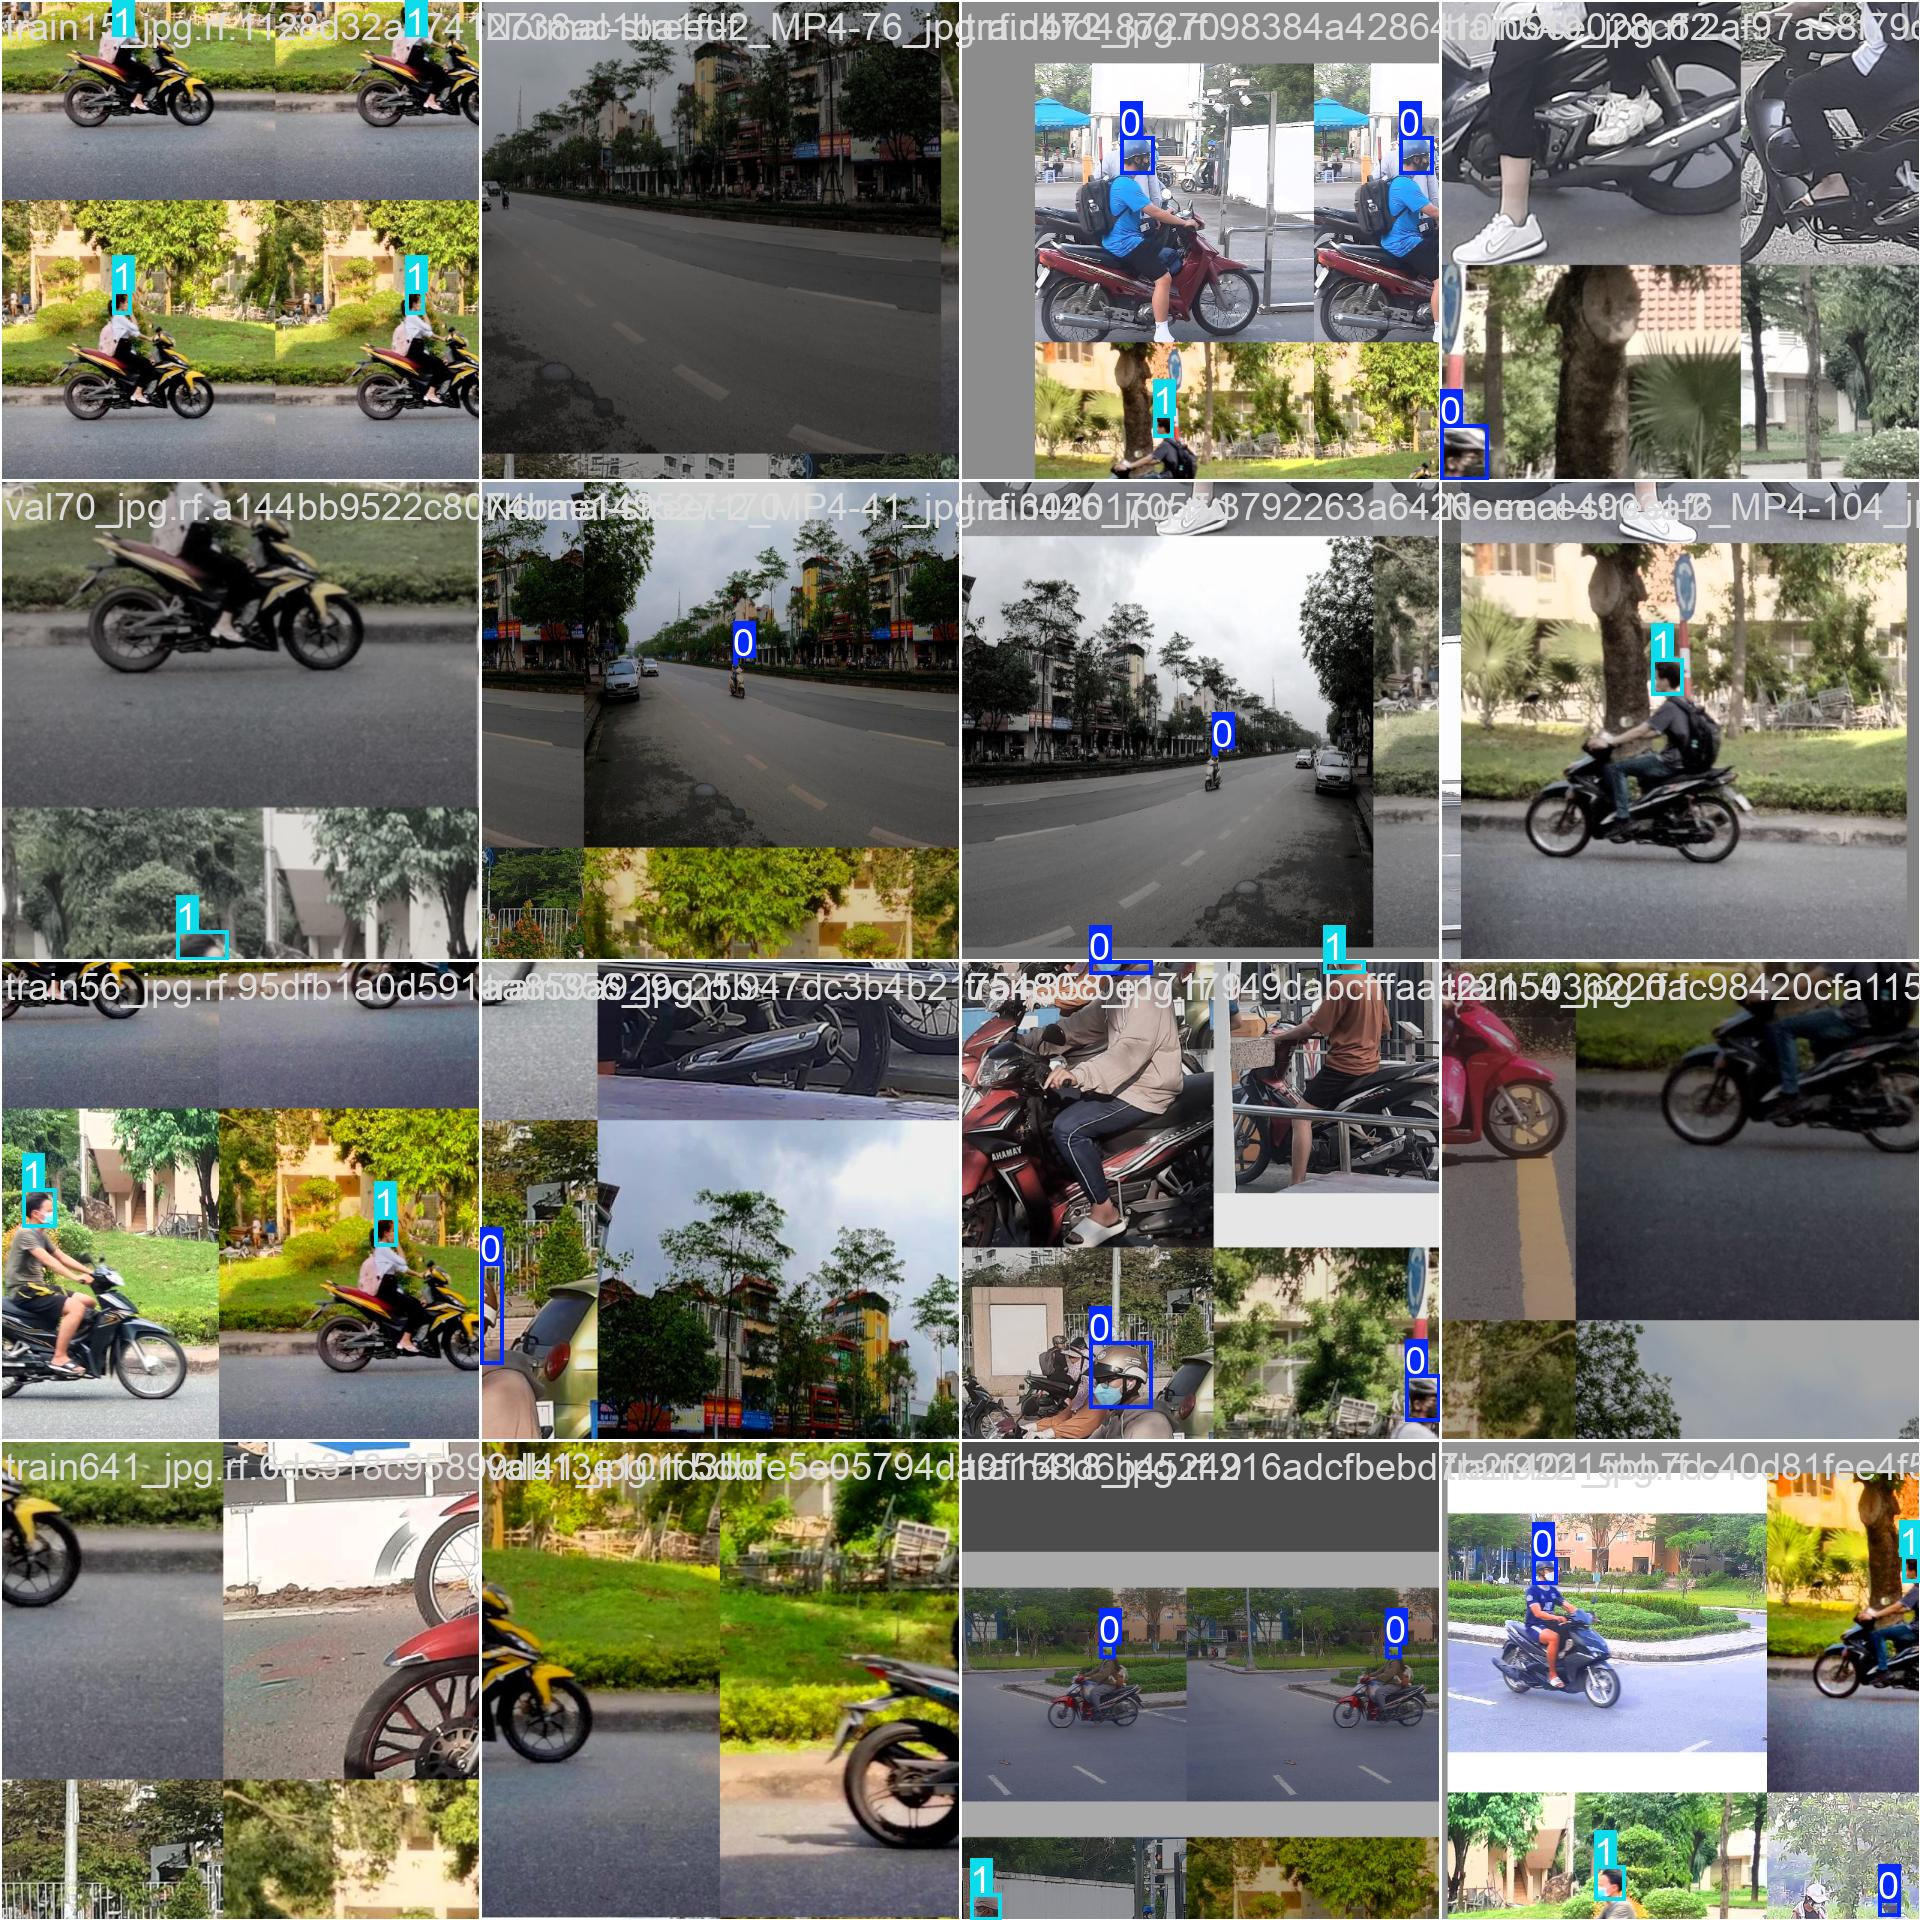

In [13]:
Image("/content/runs/detect/train/train_batch0.jpg",width=600)

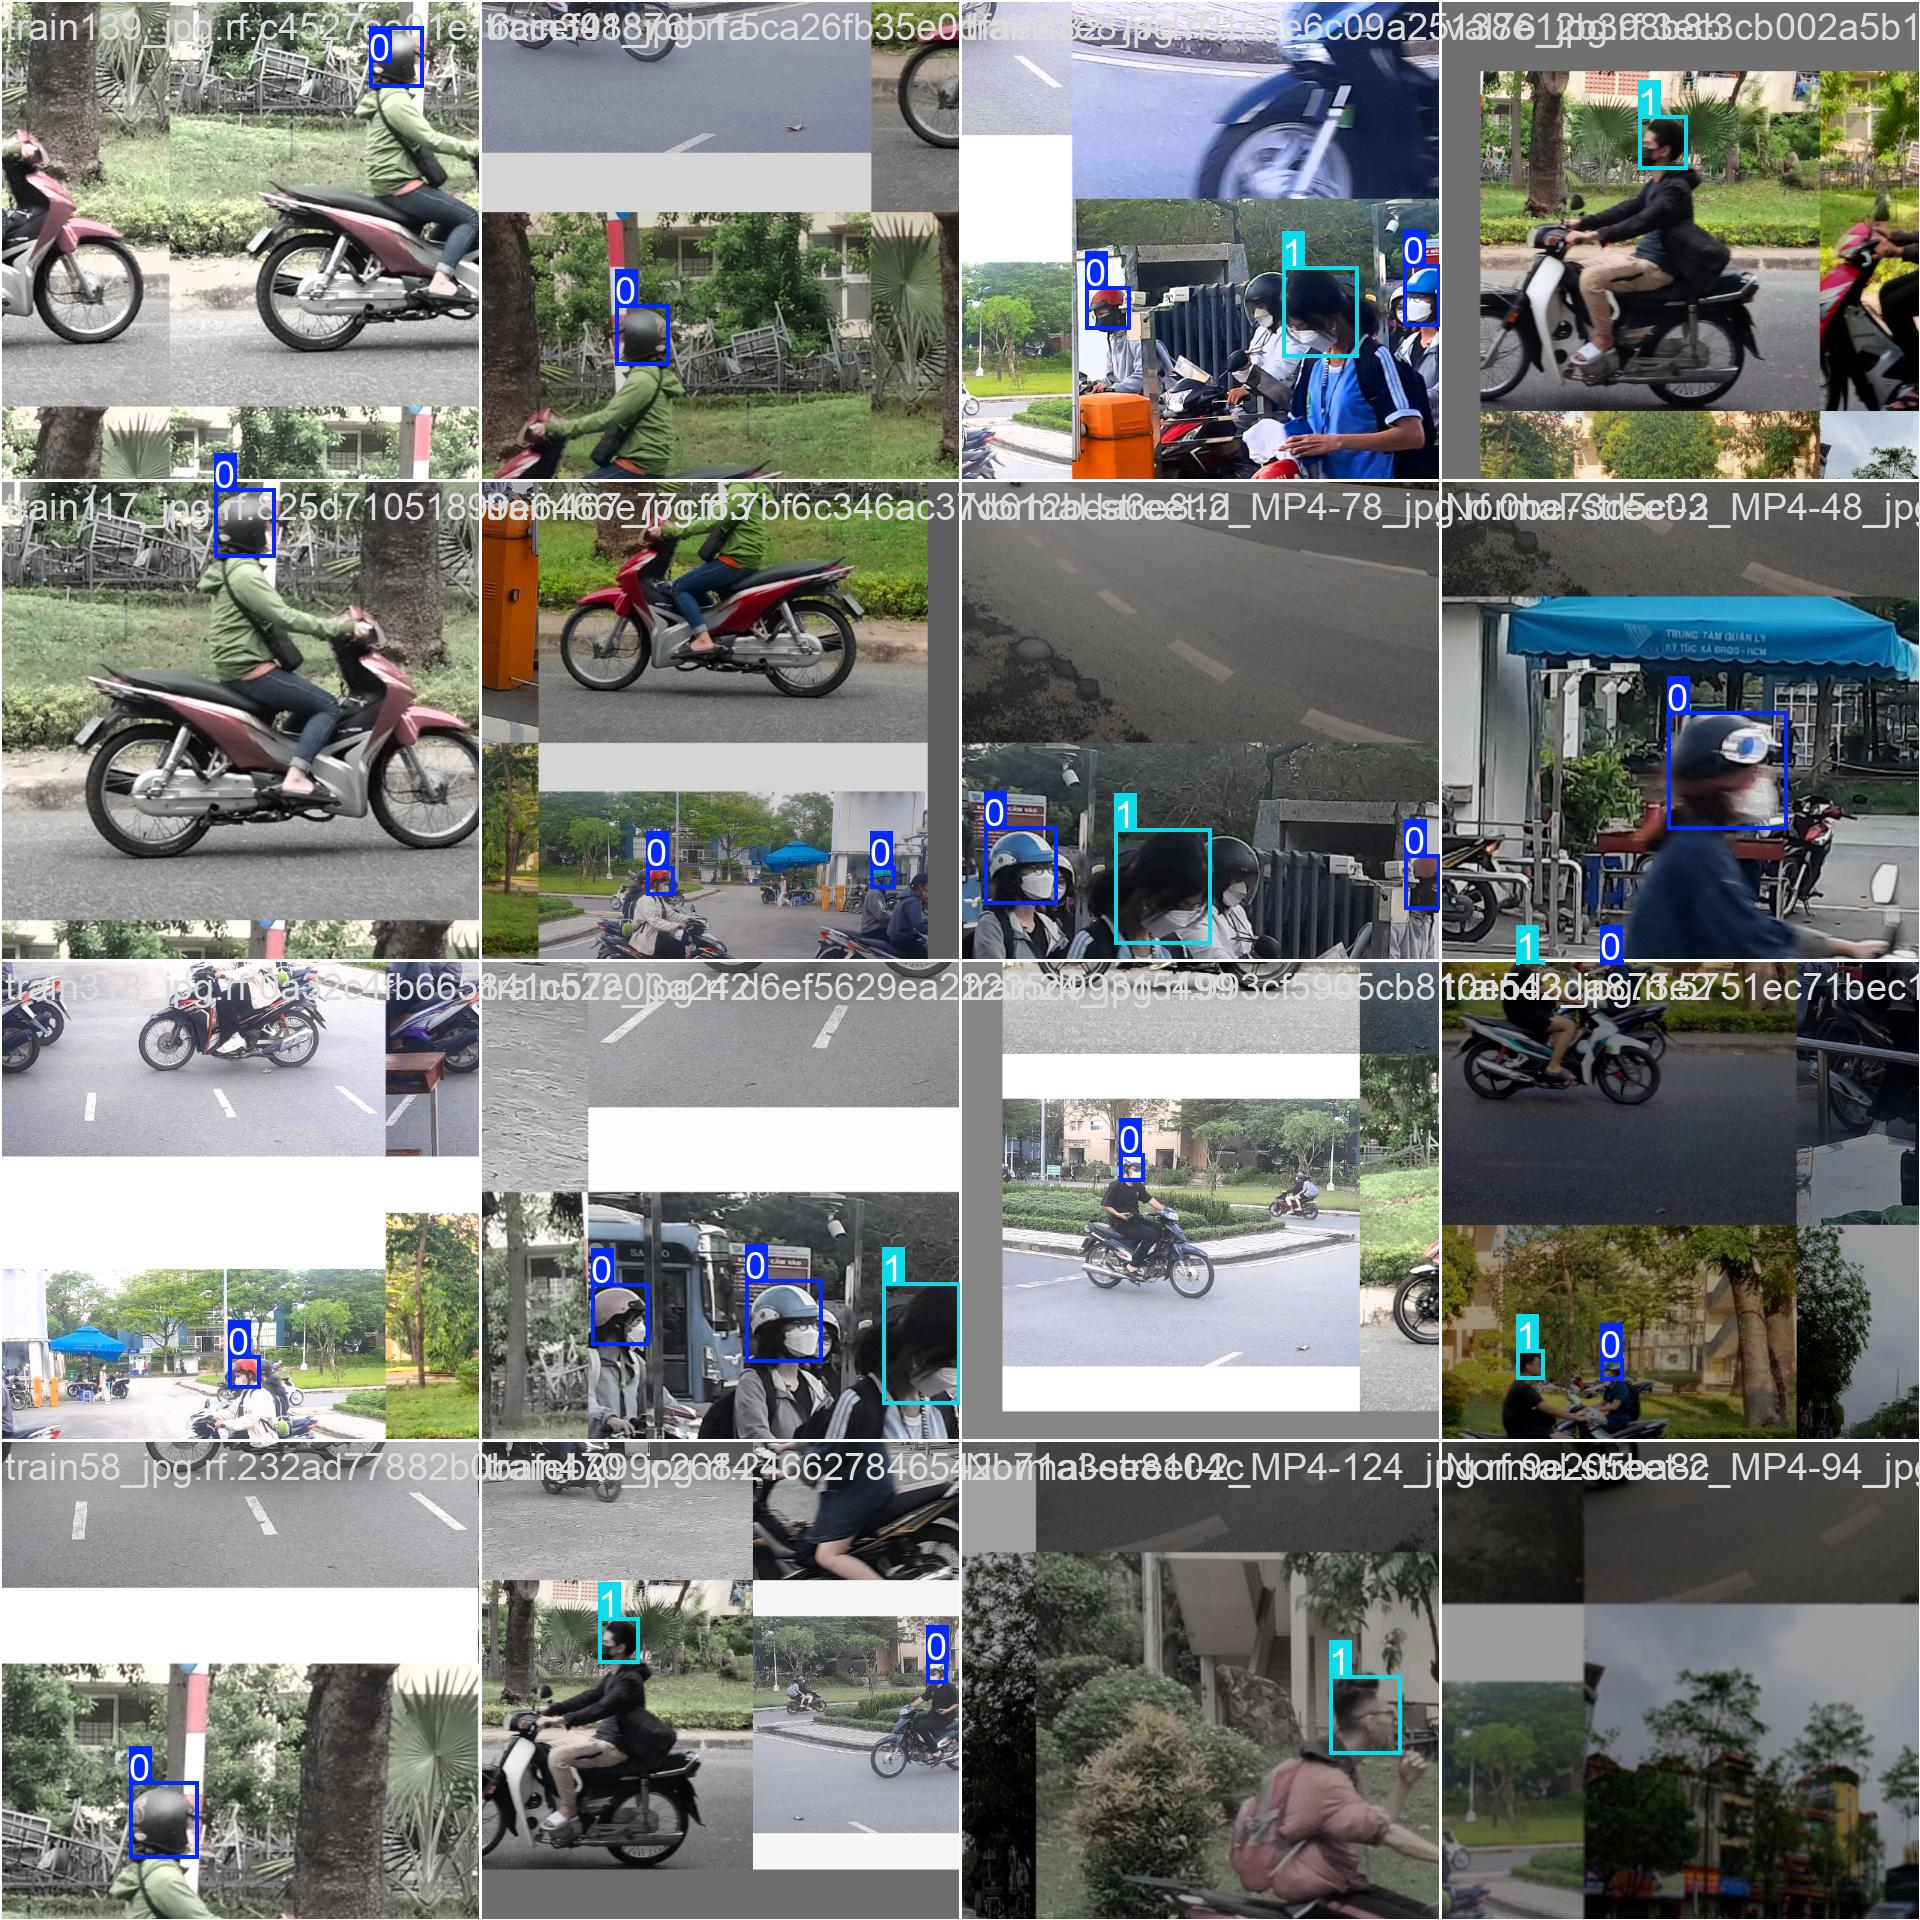

In [16]:
Image("/content/runs/detect/train/train_batch1.jpg",width=600)

Inference with Custom model on images

In [18]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/183 /content/Helmet-Detection-1/test/images/Normal-street-2_MP4-0_jpg.rf.4064eff62cd621b4285b63dfabe0a0b2.jpg: 640x640 1 helmets, 20.9ms
image 2/183 /content/Helmet-Detection-1/test/images/Normal-street-2_MP4-120_jpg.rf.e2565968a65f68bd11217f974ada87c2.jpg: 640x640 3 helmetss, 20.7ms
image 3/183 /content/Helmet-Detection-1/test/images/Normal-street-2_MP4-130_jpg.rf.4378190a9d912d64eeb2390aeaadbdf7.jpg: 640x640 (no detections), 17.0ms
image 4/183 /content/Helmet-Detection-1/test/images/Normal-street-2_MP4-24_jpg.rf.292147990afe4f7d340e7095fae72761.jpg: 640x640 (no detections), 15.4ms
image 5/183 /content/Helmet-Detection-1/test/images/Normal-street-2_MP4-25_jpg.rf.322f9ad3786bd9108c9096ba8b197fac.jpg: 640x640 (no detections), 13.3ms
image 6/183 /content/Helmet-Detection-1/test/images/Normal-street-2_MP4-29_jpg.rf.3c

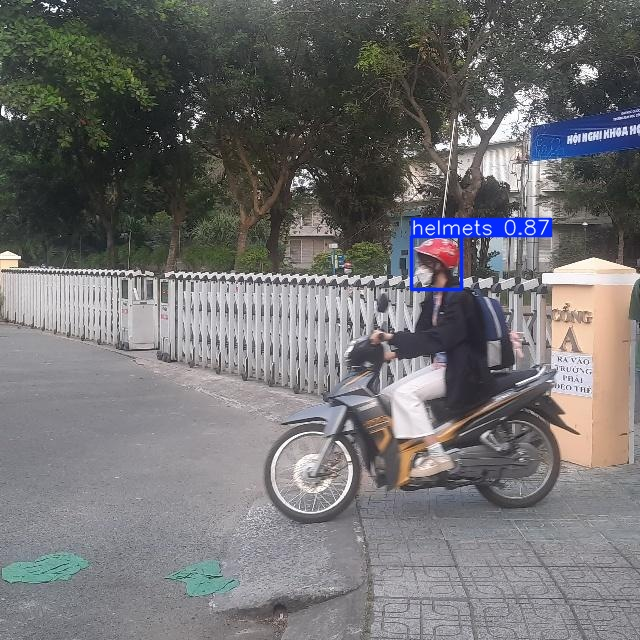

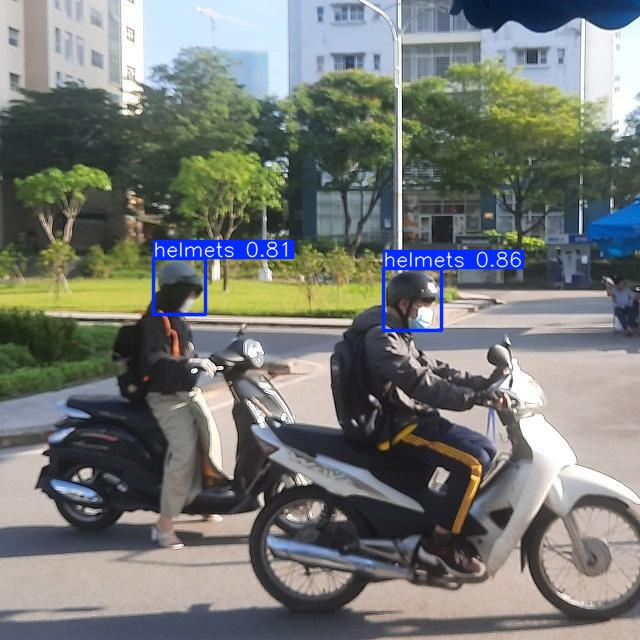

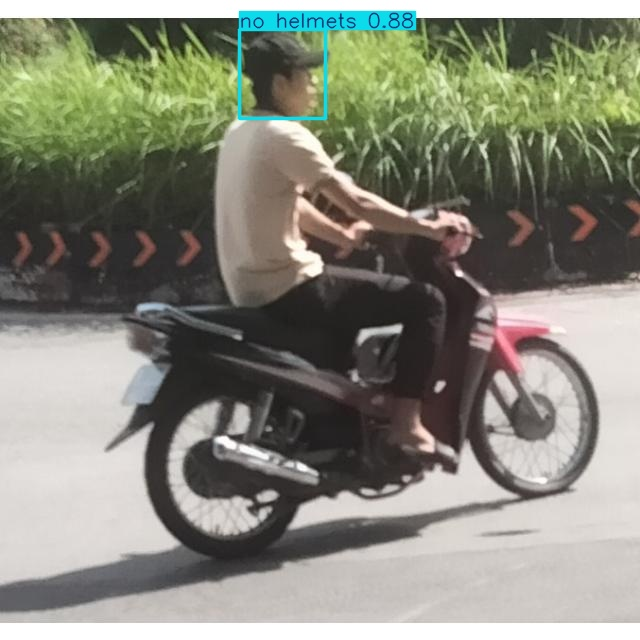

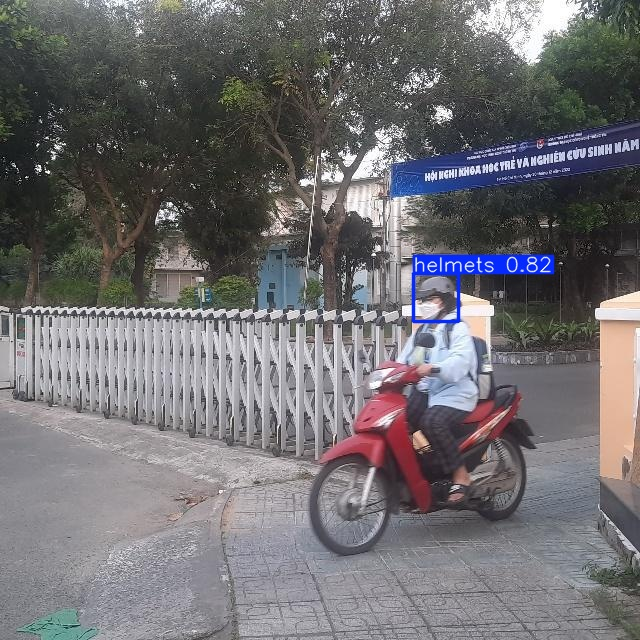

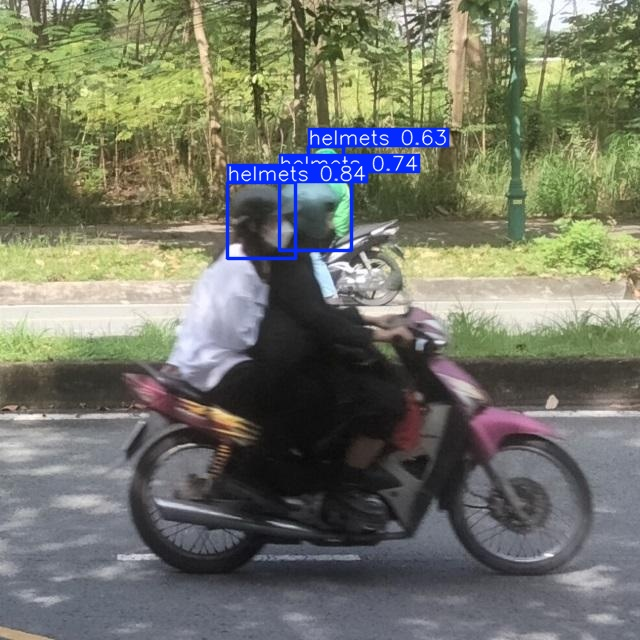

In [21]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:6]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [25]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=/content/Helmet-Detection-1/helmet4.webp save=True

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/Helmet-Detection-1/helmet4.webp: 384x640 1 helmets, 50.1ms
Speed: 4.0ms preprocess, 50.1ms inference, 543.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


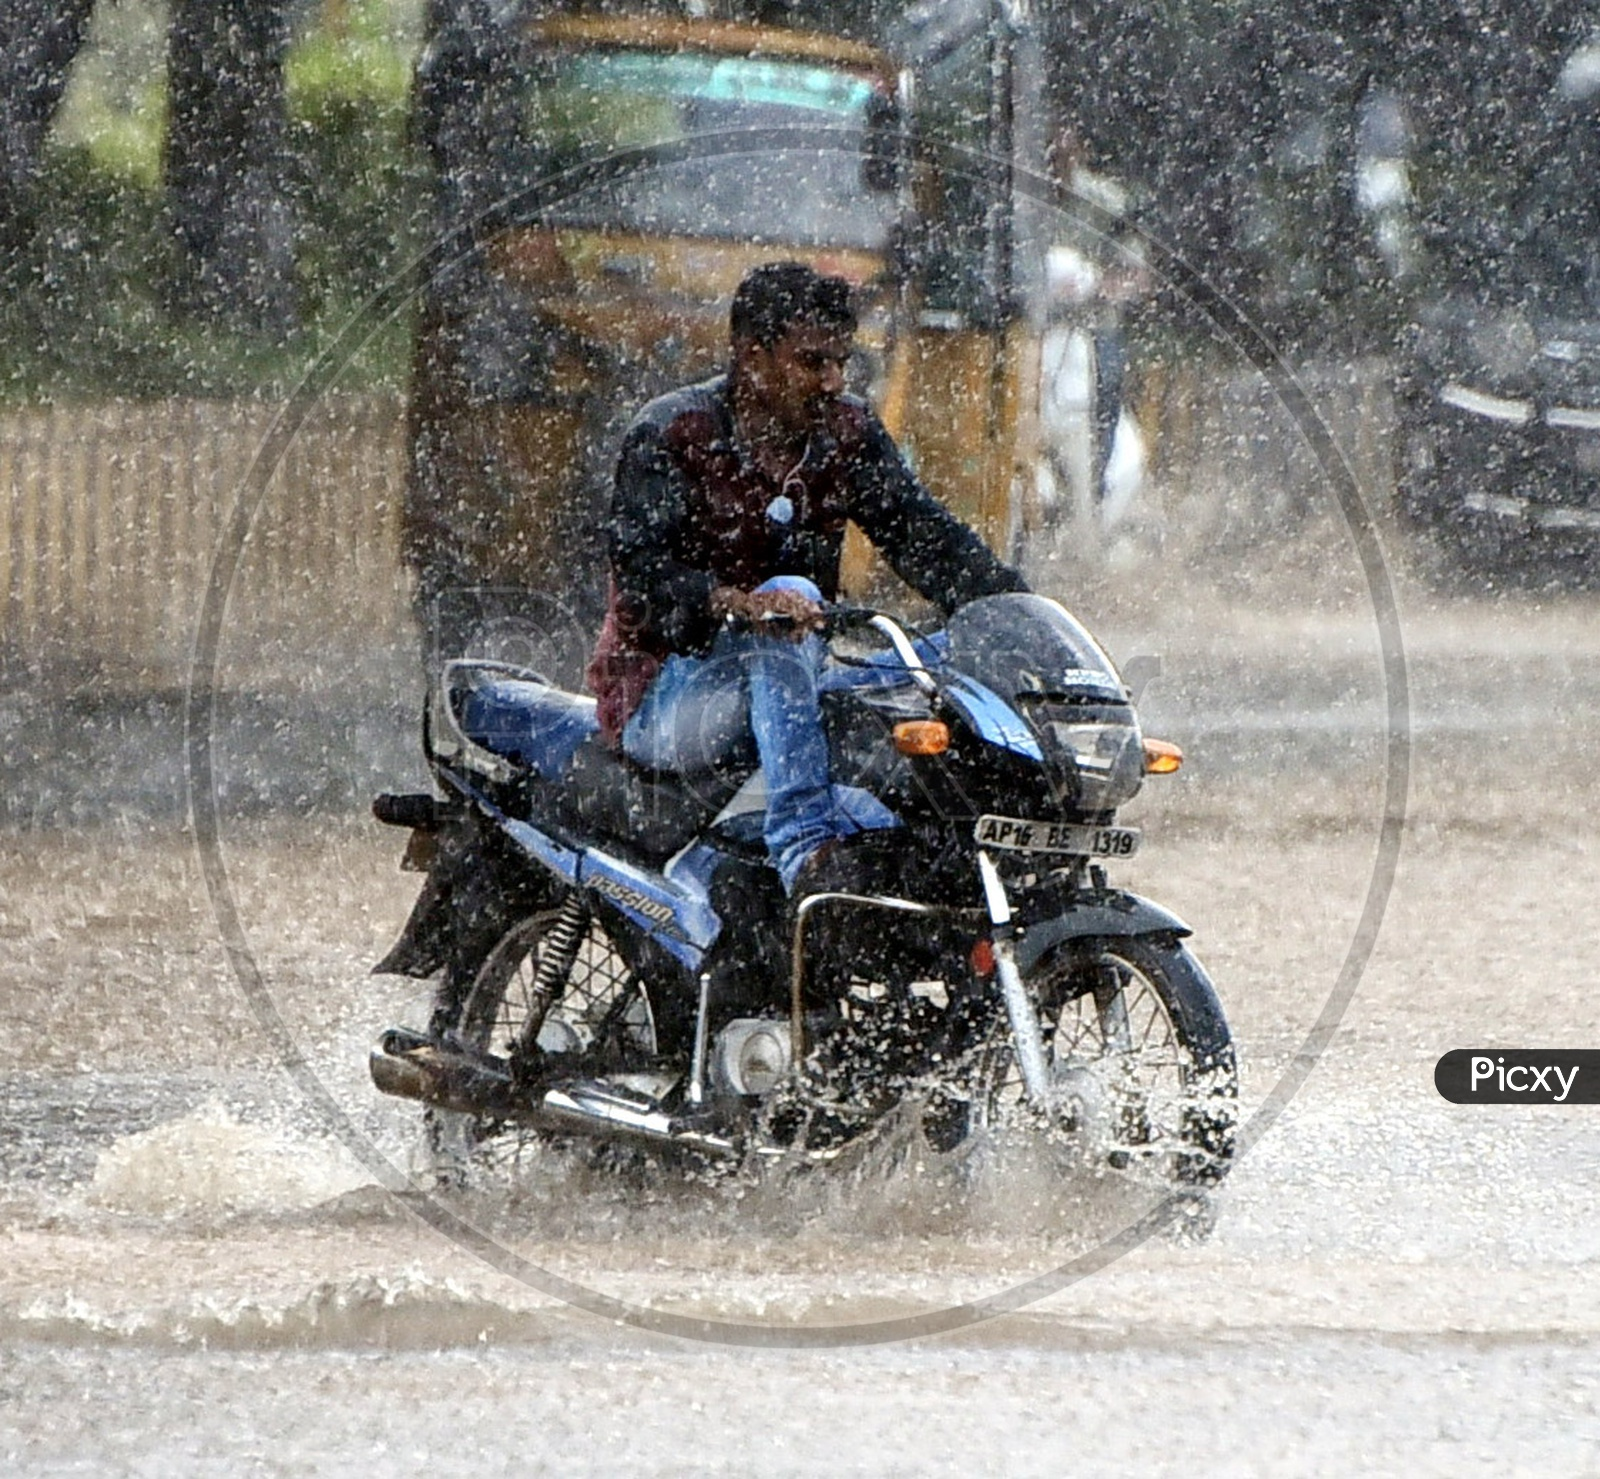

In [31]:
Image("/content/runs/detect/predict2/helmet1.jpg",width=600)

Model failed to detect there is no helmet,in the above figure.

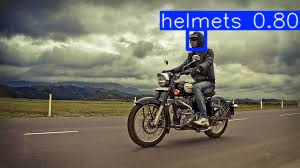

In [28]:
Image("/content/runs/detect/predict3/helmet2.jpg",width=600)

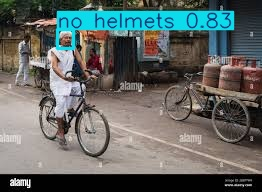

In [29]:
Image("/content/runs/detect/predict4/helmet3.jpg",width=600)

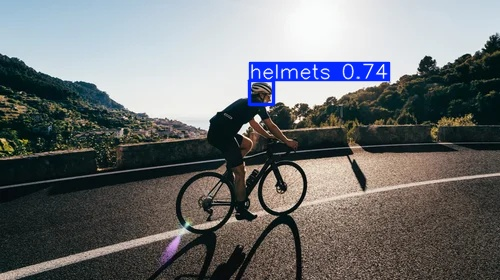

In [30]:
Image("/content/runs/detect/predict5/helmet4.jpg",width=600)